# Exploratory Data Analysis (EDA)

## Purpose
This notebook explores the cleaned housing market dataset to uncover trends, patterns, and insights. The findings will inform feature engineering and modeling decisions.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Load the Cleaned Dataset

The cleaned dataset is loaded from the `data/processed/` folder. Below is an overview:

- **Columns**: `sale_year`, `median_price`, `transaction_count`, `type_encoded`, `small_area_encoded`.
- **No Missing Data**: All columns have 340 non-null values.
- **Summary**:
  - `median_price` ranges from 0 to 14,300,000 with an average of 666,283.
  - `sale_year` spans from 2000 to 2016.


In [2]:
file_path = '/Users/ebythomas/Documents/GitHub/Melbourne_Housing_Analytics/data/processed/cleaned_housing_data.csv'
housing_data = pd.read_csv(file_path)

#Display dataset overview
housing_data.info()
housing_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sale_year           340 non-null    int64  
 1   median_price        340 non-null    float64
 2   transaction_count   340 non-null    int64  
 3   type_encoded        340 non-null    int64  
 4   small_area_encoded  340 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 13.4 KB


,sale_year,median_price,transaction_count,type_encoded,small_area_encoded
count,340.000000,3.400000e+02,340.000000,340.000000,340.000000
mean,2008.170588,6.662830e+05,282.352941,0.550000,4.964706
std,4.879705,8.564890e+05,483.899163,0.498227,3.198256
min,2000.000000,0.000000e+00,1.000000,0.000000,0.000000
25%,2004.000000,3.747375e+05,48.750000,0.000000,2.000000
50%,2008.000000,5.020000e+05,122.000000,1.000000,5.000000
75%,2012.000000,7.675000e+05,225.250000,1.000000,8.000000
max,2016.000000,1.430000e+07,3766.000000,1.000000,10.000000


In [3]:
housing_data.head()

,sale_year,median_price,transaction_count,type_encoded,small_area_encoded
0,2000,316250.0,116,0,0
1,2000,220000.0,309,1,0
2,2000,622500.0,42,0,2
3,2000,295000.0,139,1,2
4,2000,215250.0,258,0,3


## Univariate Analysis

### Distribution of Median Prices

The histogram below displays the distribution of `median_price` across all properties.

- **Key Observations**:
  - The majority of properties have median prices below 2 million.
  - The distribution is heavily skewed to the right, with a few outliers representing very high-priced properties.
  - This skewness might need addressing (e.g., log transformation) in subsequent analysis.


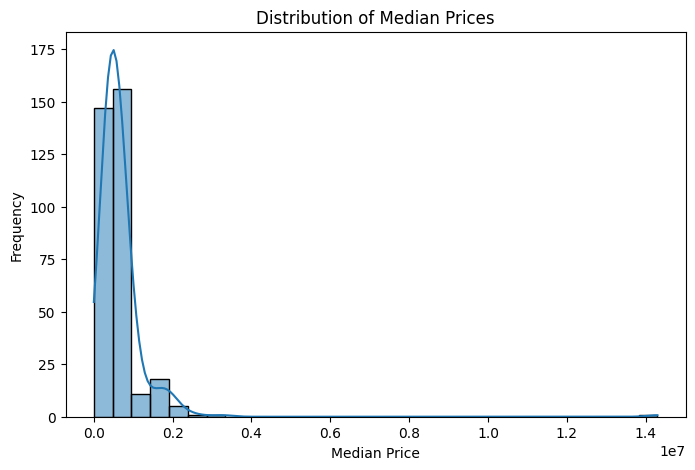

In [5]:

# Plot distribution of median_price
plt.figure(figsize=(8, 5))
sns.histplot(housing_data['median_price'], bins=30, kde=True)
plt.title('Distribution of Median Prices')
plt.xlabel('Median Price')
plt.ylabel('Frequency')
plt.show()


### Property Type Distribution

The bar chart below visualizes the distribution of property types (`type_encoded`).

- **Encoded Values**:
  - `0`: House/Townhouse
  - `1`: Residential Apartment

- **Key Observations**:
  - The dataset shows a nearly balanced distribution of property types.
  - This ensures both categories are adequately represented for analysis and modeling.


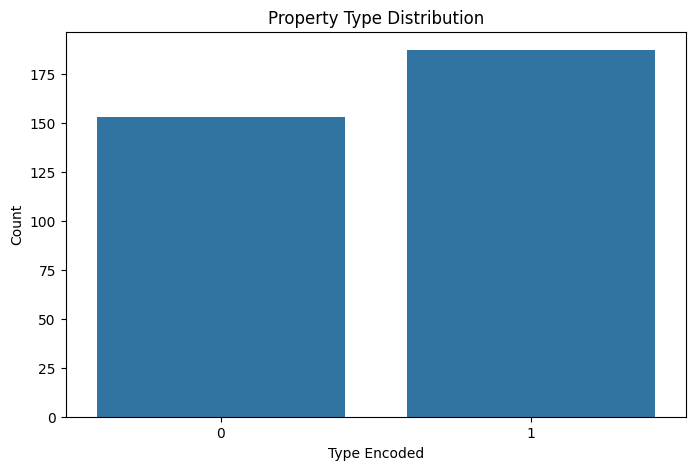

In [6]:
# Plot count of property types
plt.figure(figsize=(8, 5))
sns.countplot(x='type_encoded', data=housing_data)
plt.title('Property Type Distribution')
plt.xlabel('Type Encoded')
plt.ylabel('Count')
plt.show()


## Bivariate Analysis

### Median Price Trends Over Years

The line plot below shows the trend of `median_price` over the years.

- **Key Observations**:
  - A steady increase in `median_price` is observed from 2000 to 2008.
  - A significant spike occurs around 2010, followed by a drop and stabilization.
  - This trend highlights fluctuations in the housing market during this period, possibly linked to external factors like economic events.


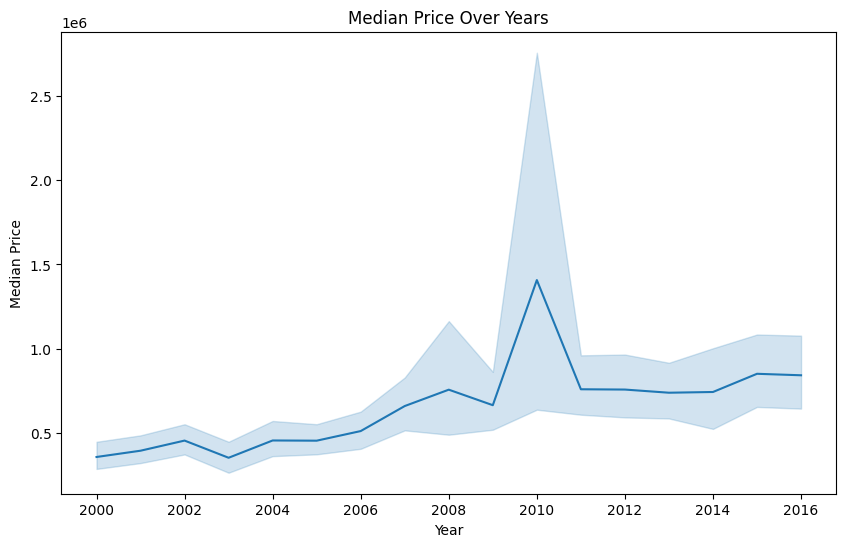

In [7]:
#plot price trends over time

plt.figure(figsize=(10,6))
sns.lineplot(x='sale_year',y='median_price', data =housing_data)
plt.title('Median Price Over Years')
plt.xlabel('Year')
plt.ylabel('Median Price')
plt.show()

### Median Price by Property Type

The box plot below visualizes the distribution of `median_price` across different property types (`type_encoded`).

- **Encoded Values**:
  - `0`: House/Townhouse
  - `1`: Residential Apartment

- **Key Observations**:
  - Houses/Townhouses tend to have slightly higher median prices compared to Residential Apartments.
  - There are a few outliers with very high median prices in both categories.
  - The median values for both property types are relatively close, indicating moderate price differences.


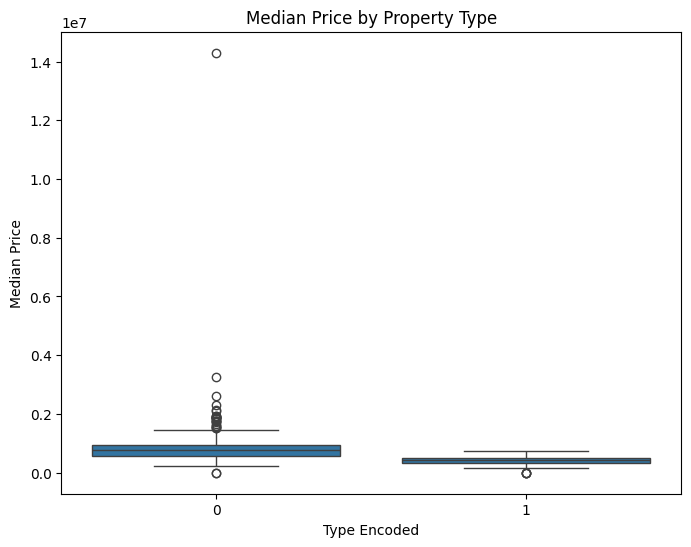

In [8]:
plt.figure(figsize=(8,6))
sns.boxplot(x='type_encoded',y='median_price',data =housing_data)
plt.title('Median Price by Property Type')
plt.xlabel('Type Encoded')
plt.ylabel('Median Price')
plt.show()

## Multivariate Analysis

### Median Price Trends Across Sale Year and Property Type

The line plot below shows the trend of `median_price` over time (`sale_year`) for different property types (`type_encoded`).

- **Encoded Values**:
  - `0`: House/Townhouse
  - `1`: Residential Apartment

- **Key Observations**:
  - Houses/Townhouses (`type_encoded = 0`) consistently show higher median prices compared to Residential Apartments (`type_encoded = 1`).
  - Both property types experience a notable price spike around 2010, followed by a stabilization period.
  - The price disparity between the two property types remains relatively constant over the years.


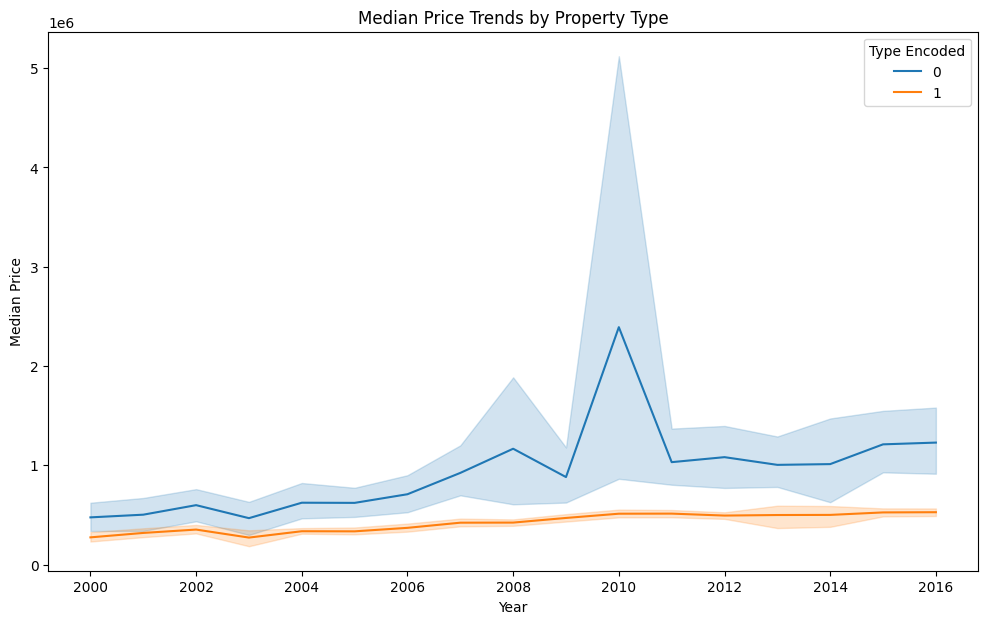

In [9]:
# Line plot by year and property type
plt.figure(figsize=(12, 7))
sns.lineplot(x='sale_year', y='median_price', hue='type_encoded', data=housing_data)
plt.title('Median Price Trends by Property Type')
plt.xlabel('Year')
plt.ylabel('Median Price')
plt.legend(title='Type Encoded')
plt.show()


## Geographic Insights

### Median Price by Small Area

The bar plot below shows the `median_price` across different small areas in Melbourne.

- **Key Observations**:
  - East Melbourne, South Yarra, and Southbank have the highest median prices.
  - Areas like North Melbourne, Parkville, and Carlton have relatively lower median prices.
  - This variation highlights the influence of location on property values within Melbourne.


/var/folders/7z/1fnfdg6j7v11htdvh6ltq_yw0000gn/T/ipykernel_38361/4020681035.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


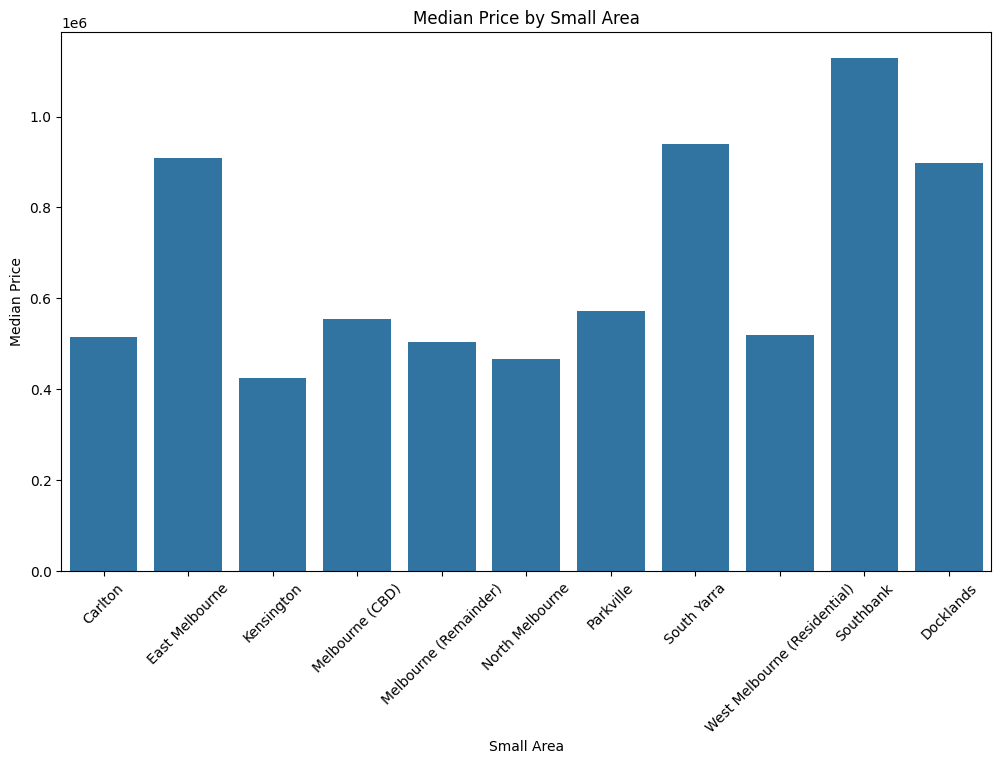

In [11]:
# Mapping of encoded values to actual small area names
small_area_mapping = {
    0: "Carlton",
    1: "Docklands",
    2: "East Melbourne",
    3: "Kensington",
    4: "Melbourne (CBD)",
    5: "Melbourne (Remainder)",
    6: "North Melbourne",
    7: "Parkville",
    8: "South Yarra",
    9: "Southbank",
    10: "West Melbourne (Residential)"
}

# Bar plot with actual small area names
plt.figure(figsize=(12, 7))
sns.barplot(
    x=housing_data['small_area_encoded'].map(small_area_mapping),  # Map names directly in the plot
    y='median_price',
    data=housing_data,
    ci=None
)
plt.title('Median Price by Small Area')
plt.xlabel('Small Area')
plt.ylabel('Median Price')
plt.xticks(rotation=45)
plt.show()
